<a href="https://colab.research.google.com/github/hsbidkar/StackOverflowEDA/blob/main/CaseStudy1_StackOverFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CaseStudy1***
## *EDA of StackOverFlow Question-Answernaire*
Google CoLab is being used here to do the EDA and links for the dataset are as below:

*Questions.csv: Different questions asked by the users*

https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv

*Answers.csv: All the answers that are given to the aforementioned questions*

https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv

*Tags.csv: The various tags of the questions that are asked*

https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv

*Users.csv: All the users that were present between the mentioned duration*

https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

### Start loading the data into DF and begin the analysis.


#### *We start with Questions.csv first*

In [ ]:
qs=pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv",encoding='latin-1')
qs.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
qs.dtypes

Id                int64
OwnerUserId     float64
CreationDate     object
ClosedDate       object
Score             int64
Title            object
Body             object
dtype: object

In [ ]:
qs.describe()

,Id,OwnerUserId,Score
count,1.264216e+06,1.249762e+06,1.264216e+06
mean,2.132745e+07,2.155177e+06,1.781537e+00
std,1.151445e+07,1.801265e+06,1.366389e+01
min,8.000000e+01,1.000000e+00,-7.300000e+01
25%,1.142598e+07,6.589110e+05,0.000000e+00
50%,2.172542e+07,1.611830e+06,0.000000e+00
75%,3.154542e+07,3.353792e+06,1.000000e+00
max,4.014338e+07,7.046594e+06,5.190000e+03


 *Above data shows that data has OwnerUserId as float and this need conversion to int but when using qs.OwnerUserId.astype(int) we see that it throws error as data has NaN in it, so we convert such values as 0 and then convert it to int*

In [ ]:
qs[qs.OwnerUserId.isnull()==True]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
47,4170,NaN,2008-08-07T00:25:03Z,NaN,9,How to learn ADO.NET,<p>I need to learn ADO.NET to build applicatio...
130,12330,NaN,2008-08-15T15:06:31Z,NaN,6,Programmatically list WMI classes and their pr...,"<p>Hey everyone, \nIs there any known way of l..."
158,15190,NaN,2008-08-18T20:32:49Z,NaN,2,Changing CURRENT save/default directory in Del...,<p>I have a project group that contains a proj...
198,18250,NaN,2008-08-20T15:40:53Z,NaN,0,Creation Date of Compiled Executable (VC++ 2005),<p>The creation date of an executable linked i...
300,29100,NaN,2008-08-26T22:28:22Z,NaN,5,How are you generating tests from specifications?,"<p>I came across a printed <a href=""http://www..."
...,...,...,...,...,...,...,...
1261359,40076260,NaN,2016-10-16T22:38:59Z,NaN,1,How can I find out if two lines overlap?,<p>My function takes two objects that represen...
1261501,40079260,NaN,2016-10-10T15:10:51Z,NaN,0,"VB6.0 ""Run - time error '3709': The connection...","<p><a href=""http://i.stack.imgur.com/M2EV8.png..."
1263664,40130890,NaN,2016-10-19T12:02:24Z,2016-10-19T20:52:39Z,-4,How would i change my program so that the colo...,"<p><div class=""snippet"" data-lang=""js"" data-hi..."
1263908,40136590,NaN,2016-10-19T13:24:10Z,2016-10-19T16:37:57Z,0,Names of variables inside the 'for loop',<p>In <strong>my_data</strong> I want to creat...


In [ ]:
qs.OwnerUserId.fillna(value='0',inplace=True)
qs.OwnerUserId[qs.OwnerUserId.isnull()==True].count()

0

In [ ]:
qs.OwnerUserId = qs.OwnerUserId.astype(int)

In [ ]:
qs.dtypes

Id               int64
OwnerUserId      int64
CreationDate    object
ClosedDate      object
Score            int64
Title           object
Body            object
dtype: object

In [ ]:
qs.count()

Id              1264216
OwnerUserId     1264216
CreationDate    1264216
ClosedDate        55959
Score           1264216
Title           1264216
Body            1264216
dtype: int64

In [ ]:
qs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Id            1264216 non-null  int64 
 1   OwnerUserId   1264216 non-null  int64 
 2   CreationDate  1264216 non-null  object
 3   ClosedDate    55959 non-null    object
 4   Score         1264216 non-null  int64 
 5   Title         1264216 non-null  object
 6   Body          1264216 non-null  object
dtypes: int64(3), object(4)
memory usage: 67.5+ MB


*Top 20 questions & their scores*

In [ ]:
qs_sort = qs.sort_values(by=['Score'],ascending = False)
qs_sort[['Id','Score','Title']].head(20)

,Id,Score,Title
4907,348170,5190,How to undo 'git add' before commit?
441,40480,3613,"Is Java ""pass-by-reference"" or ""pass-by-value""?"
5859,406230,2537,Regular expression to match line that doesn't ...
7771,520650,2399,Make an existing Git branch track a remote bra...
57759,2669690,2363,Why does Google prepend while(1); to their JSO...
105015,4366730,1760,How to check if a string contains a specific w...
22609,1232040,1759,How do I empty an array in JavaScript?
485729,16956810,1716,How to find all files containing specific text...
67133,3010840,1620,Loop through an array in JavaScript
26,2530,1614,How do you disable browser Autocomplete on web...


*Top 20 Users who have asked questions, We are ignoring the OwnerUserId = 0 as it was NaN*

In [ ]:
qs[qs.OwnerUserId!=0].groupby('OwnerUserId')['OwnerUserId'].count().sort_values(ascending=False)[:20]

OwnerUserId
875317     250
39677      227
4653       175
651174     164
34537      153
1194415    147
179736     142
117700     141
84201      140
470184     132
65387      124
892029     123
260127     121
784597     119
149080     116
325418     116
122536     114
8741       114
4639       114
257022     113
Name: OwnerUserId, dtype: int64

*Store above data for further analysis as DF in qs_t20u*

In [ ]:
qs_t20u = qs[qs.OwnerUserId!=0].groupby('OwnerUserId')['OwnerUserId'].count().sort_values(ascending=False)[:20]

#### *Next we start with Answers.csv*

In [ ]:
ans=pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv",encoding='latin-1')
ans.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
ans.describe()

,Id,OwnerUserId,ParentId,Score
count,2.014516e+06,2.001316e+06,2.014516e+06,2.014516e+06
mean,1.915490e+07,1.487613e+06,1.808390e+07,2.480563e+00
std,1.168713e+07,1.549051e+06,1.169152e+07,1.590938e+01
min,9.200000e+01,1.000000e+00,8.000000e+01,-4.200000e+01
25%,8.854490e+06,2.818680e+05,7.692900e+06,0.000000e+00
50%,1.866246e+07,9.546430e+05,1.712404e+07,1.000000e+00
75%,2.929756e+07,2.197072e+06,2.804977e+07,2.000000e+00
max,4.014339e+07,7.045028e+06,4.014319e+07,5.718000e+03


In [ ]:
ans.dtypes

Id                int64
OwnerUserId     float64
CreationDate     object
ParentId          int64
Score             int64
Body             object
dtype: object

Above data shows that data has OwnerUserId as float and this need conversion to int but when using ans.OwnerUserId.astype(int) we see that it throws error as data has NaN in it, so we convert such values as 0 and then convert it to int

In [ ]:
ans[ans.OwnerUserId.isnull()==True]

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
29,1051,NaN,2008-08-04T06:15:30Z,1040,11,<P>The typical method is as follows. You've sa...
176,5321,NaN,2008-08-07T21:11:52Z,3230,10,<P>You need to set the run-time library (Under...
241,7464,NaN,2008-08-11T01:11:07Z,7440,2,"<p>We use Selenium Core, but are switching gra..."
251,7587,NaN,2008-08-11T07:33:18Z,6210,0,<p>How about using the new Workflow components...
321,9562,NaN,2008-08-13T07:52:51Z,4860,0,<p>Can you let us know that technology you are...
...,...,...,...,...,...,...
2009549,40037805,NaN,2016-10-14T07:51:09Z,40037610,0,<p>just change the code to <br></p>\n\n<pre><c...
2010030,40047726,NaN,2016-10-14T16:15:27Z,40047680,1,<p>You can create a single function that calls...
2010875,40065684,NaN,2016-10-16T00:40:42Z,10228750,0,<p>Your class UserController </p>\n\n<p>route:...
2013281,40117272,NaN,2016-10-18T20:13:28Z,40115990,1,"<p>As this <a href=""http://stackoverflow.com/a..."


In [ ]:
ans.OwnerUserId.fillna(value='0',inplace=True)
ans.OwnerUserId[ans.OwnerUserId.isnull()==True].count()

0

In [ ]:
ans.OwnerUserId = ans.OwnerUserId.astype(int)

In [ ]:
ans.dtypes

Id               int64
OwnerUserId      int64
CreationDate    object
ParentId         int64
Score            int64
Body            object
dtype: object

In [ ]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Id            int64 
 1   OwnerUserId   int64 
 2   CreationDate  object
 3   ParentId      int64 
 4   Score         int64 
 5   Body          object
dtypes: int64(4), object(2)
memory usage: 92.2+ MB


Top 20 question & their score with respect to Answer Body


In [ ]:
ans_sort = ans.sort_values(by=['Score'],ascending = False)
ans_sort[['ParentId','Score','Body']].head(20)

,ParentId,Score,Body
18568,348170,5718,<p>You can undo <code>git add</code> before co...
21768,406230,3637,<p>The notion that regex doesn't support inver...
253713,4366730,3549,"<p>You can use the <a href=""http://php.net/man..."
1870,40480,3038,<p>Java is always <strong>pass-by-value</stron...
922565,16956810,2988,"<p>Do the following:</p>\n\n<pre class=""lang-s..."
135055,520650,2925,<p>Given a branch <code>foo</code> and a remot...
70939,1218390,2867,<h3>Your problem with <strong>Vim</strong> is ...
157039,2669690,2594,"<p>It prevents <a href=""http://haacked.com/arc..."
679559,6245570,2419,<pre><code>git rev-parse --abbrev-ref HEAD\n</...
51131,894860,2305,"<p>From ES6/ES2015, default parameters is in t..."


*Top 20 users answering the questions*

In [ ]:
ans[ans.OwnerUserId!=0].groupby('OwnerUserId')['OwnerUserId'].count().sort_values(ascending=False)[:20]

OwnerUserId
22656      3270
1144035    3009
29407      2144
548225     1924
115145     1813
100297     1675
157882     1673
6309       1624
17034      1607
19068      1586
34397      1474
1491895    1393
23354      1296
335858     1292
57695      1275
157247     1246
571407     1220
20862      1207
505088     1190
207421     1134
Name: OwnerUserId, dtype: int64

*Store the above in ans_t20u*

In [ ]:
ans_t20u = ans[ans.OwnerUserId!=0].groupby('OwnerUserId')['OwnerUserId'].count().sort_values(ascending=False)[:20]

#### We perform analysis for Tags.csv

In [ ]:
tags=pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv",encoding='Latin-1')
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [ ]:
tags.describe()

,Id
count,3.750994e+06
mean,2.148285e+07
std,1.147246e+07
min,8.000000e+01
25%,1.164430e+07
50%,2.196248e+07
75%,3.164509e+07
max,4.014338e+07


In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


*Unique Tag & its count*

In [ ]:
tags['Tag'].unique()

array(['flex', 'actionscript-3', 'air', ..., 'union-types', 'voce',
       'docker-windows'], dtype=object)

In [ ]:
len(list(tags['Tag'].unique()))

37035

*Number of Questions per Tag*

In [ ]:
tags.groupby(by='Tag').count().sort_values(by='Id',ascending=False)

,Id
Tag,
javascript,124155
java,115212
c#,101186
php,98808
android,90659
...,...
tbcd,1
evil-dicom,1
evo,1


In [ ]:
tagcount=pd.DataFrame(tags.groupby(by='Tag').count().sort_values(by='Id',ascending=False))

*Top 25 tags plot as barchart*

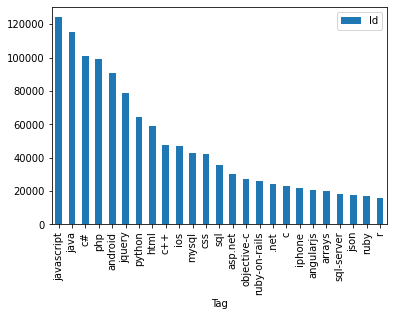

In [ ]:
tagcount[:25].plot.bar()

Above clearly suggest that javascript is the most tagged followed by java, c#, php, android, jquery, python, html, c++ & ios in top 10

Find mean, count and standard deviation of Tag via describe & boxplot



In [ ]:
tagcount.describe()

,Id
count,37034.000000
mean,101.255090
std,1578.834319
min,1.000000
25%,2.000000
50%,6.000000
75%,22.000000
max,124155.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7f522f053f90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f522f059fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f522f4bc1d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f522f061ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f522f059550>,
  <matplotlib.lines.Line2D at 0x7f522f059a90>]}

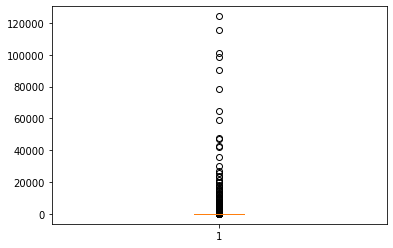

In [ ]:
plt.boxplot(tagcount['Id'])

Above suggest that most of the tags are overrated and are the only ones questioned due to fact that StackOverflow is mostly for Programming languages

#### *Lastly perform analysis for Users.csv*

In [ ]:
usr=pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv")
usr.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [ ]:
usr.drop(columns="Unnamed: 0",inplace=True)
usr.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [ ]:
usr.drop_duplicates(subset="id",keep="first",inplace=True)
usr.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96


Top 20 users as per reputation

In [ ]:
usr_sort = usr.sort_values(by=['reputation'],ascending = False)
usr_sort[['id','display_name','reputation']][:20]

,id,display_name,reputation
110999,22656,Jon Skeet,1128126
35238,6309,VonC,888089
69941,157882,BalusC,884381
188604,29407,Darin Dimitrov,873733
1151850,1144035,Gordon Linoff,851064
85414,23354,Marc Gravell,818771
67826,17034,Hans Passant,812298
337113,115145,CommonsWare,808485
168856,100297,Martijn Pieters,756582
407215,157247,T.J. Crowder,732984


### *We will now join the datasets based on our requirements of Data Science Tags* i.e. ['python', 'r', 'matlab', 'sas', 'excel', 'sql'] 

In [ ]:
ds_list=['python', 'r', 'matlab', 'sas', 'excel', 'sql']

In [ ]:
ds_tags=pd.DataFrame(columns=tags.columns)

In [ ]:
tags[tags.Tag=='python']

,Id,Tag
312,11060,python
503,17250,python
546,19030,python
905,31340,python
1027,34020,python
...,...,...
3750788,40141710,python
3750886,40142380,python
3750921,40142600,python
3750940,40142840,python


In [ ]:
for i in ds_list:
  ds_tags=ds_tags.append(tags[tags.Tag==i],ignore_index=True)
ds_tags.head(10)

,Id,Tag
0,11060,python
1,17250,python
2,19030,python
3,31340,python
4,34020,python
5,34570,python
6,35470,python
7,39960,python
8,42950,python
9,43290,python


*Subplot of DataScience Tags*

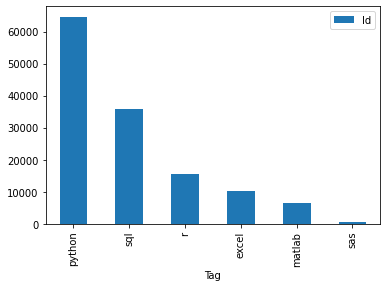

In [ ]:
ds_tags.groupby(by='Tag').count().sort_values(by='Id',ascending=False).plot.bar()

*Questions related to DataScience*

In [ ]:
qs_ds_tags=pd.merge(qs,ds_tags,on='Id',how='inner')
qs_ds_tags.head(20)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,120,83,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql
1,1970,116,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql
2,2120,383,2008-08-05T11:49:11Z,NaN,77,Convert HashBytes to VarChar,<p>I want to get the MD5 Hash of a string valu...,sql
3,2840,383,2008-08-05T20:57:00Z,NaN,32,Paging SQL Server 2005 Results,<p>How do I page results in SQL Server 2005?</...,sql
4,4110,369,2008-08-06T23:19:50Z,2014-12-30T11:43:01Z,7,What program can I use to generate diagrams of...,<p>I've been tasked with redesigning part of a...,sql
5,6340,58,2008-08-08T20:07:43Z,NaN,10,Multiple foreign keys?,<p>I've got a table that is supposed to track ...,sql
6,10190,373,2008-08-13T18:38:02Z,NaN,10,How to return a page of results from SQL?,<p>Many applications have grids that display d...,sql
7,11060,912,2008-08-14T13:59:21Z,NaN,18,How should I unit test a code-generator?,<p>This is a difficult and open-ended question...,python
8,13540,1463,2008-08-17T06:48:50Z,NaN,83,Insert Update stored proc on SQL Server,<p>I've written a stored proc that will do an ...,sql
9,17250,394,2008-08-20T00:16:40Z,NaN,24,Create an encrypted ZIP file in Python,<p>I'm creating an ZIP file with ZipFile in Py...,python


In [ ]:
qs_ds_tags.shape

(133660, 8)

There are total 133660 questions related to DataScience as per tags asked by users.

*Users who questioned Data Science related tags (random 25 users)*

In [ ]:
usr_list_ds_tags=list()
for i in qs_ds_tags.OwnerUserId.unique()[:25]:
  usr_list_ds_tags.append(list(usr['display_name'][usr.id==i]))
usr_list_ds_tags

[['Zack Peterson'],
 ['Mark Harrison'],
 ['GateKiller'],
 ['Blorgbeard'],
 ['cmcculloh'],
 ['urini'],
 ['jkp'],
 ['Guy'],
 ['PabloG'],
 ['dbr'],
 ['Seibar'],
 ['Jason Baker'],
 ['Eric Z Beard'],
 [],
 [],
 [],
 ['Jason Diller'],
 ['Eduardo Molteni'],
 ['JonnyGold'],
 ['jeremiahd'],
 ['lomaxx'],
 ['Brian Warshaw'],
 ['Niyaz'],
 [],
 ['Tyler']]

In [ ]:
usr_ds_tags=pd.DataFrame()
usr_ds_tags=pd.merge(qs_ds_tags,usr,how='inner',left_on='OwnerUserId',right_on='id')
usr_ds_tags.head(20)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,120,83,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql,83,Zack Peterson,2008-08-01 16:31:56.94 UTC,2019-08-27 20:25:33.09 UTC,31853,1966,63,2886
1,1970,116,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386
2,998950,116,2009-06-15T23:28:31Z,NaN,9,Is &#x10; a valid character in XML?,<p>On this data:</p>\n\n<pre><code>&lt;row Id=...,python,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386
3,1101390,116,2009-07-09T01:26:39Z,NaN,6,Oracle SQL Developer: sharing configuration vi...,<p>I would like to share my Oracle SQL Develop...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386
4,2169720,116,2010-01-30T22:33:02Z,NaN,4,Oracle: pivot (coalesce) some counts onto a si...,<p><strong>update: what I was calling <em>coal...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386
5,2483140,116,2010-03-20T13:17:46Z,NaN,19,"Oracle: how to ""group by"" over a range?",<p>If I have a table like this:</p>\n\n<pre><c...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386
6,2616190,116,2010-04-11T06:01:58Z,NaN,2,Python: what package contains the installation...,"<p>e.g., how can I find out that the executabl...",python,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386
7,3570720,116,2010-08-25T22:27:07Z,NaN,2,Excel: using a worksheet as a function?,<p>I've got an excel worksheet that takes two ...,excel,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386
8,9407640,116,2012-02-23T05:23:12Z,NaN,6,Python: eval() that coerces values to floating...,<p>Is there a way to execute an <code>eval</co...,python,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386
9,19284570,116,2013-10-09T23:30:38Z,NaN,1,Summarizing leaf node values in a tree using SQL?,<p>Given a column containing a set of strings ...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386


Top 25 users who asked most DS questions

In [ ]:
usr_ds_tags[['display_name','Id']].groupby(by='display_name').count().sort_values(by='Id',ascending=False)[:25]

,Id
display_name,
Alex,142
David542,121
Chris,86
John,73
Michael,63
Ben,60
l--''''''---------'''''''''''',58
TIMEX,52
Matt,50


***So, as per analysis, StackOverflow must send notification to above users so that they can check the questions and this solves the first part of our EDA.***

Answers joined with Questions based on DS tags

In [ ]:
ans_qs_ds_tags=pd.merge(usr_ds_tags,ans,how='inner',left_on='Id',right_on='ParentId')

In [ ]:
ans_qs_ds_tags.head(20)

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Body_x,Tag,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y,Body_y
0,120,83,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql,83,Zack Peterson,2008-08-01 16:31:56.94 UTC,2019-08-27 20:25:33.09 UTC,31853,1966,63,2886,124363,12734,2008-09-23T22:41:11Z,120,9,<p>The Jeff Prosise version from MSDN magazine...
1,1970,116,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386,1971,269,2008-08-05T06:43:30Z,1970,3,<p>When I wrote my first trigger it was in Per...
2,1970,116,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386,3454,277,2008-08-06T14:26:08Z,1970,5,"<p>I have only really used PL/pgSQL, but that ..."
3,1970,116,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386,59345,1081,2008-09-12T15:39:39Z,1970,2,<p>Skype uses <strong>PostgreSQL</strong> toge...
4,1970,116,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386,69641,11116,2008-09-16T05:43:22Z,1970,4,"<p>I write pretty much everything in plpgsql, ..."
5,1970,116,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386,77666,13860,2008-09-16T22:00:49Z,1970,2,<p>For anything really small/simple or that do...
6,1970,116,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386,93293,1167846,2008-09-18T14:54:22Z,1970,2,<p>PL/Ruby because I use Ruby every day anyway...
7,1970,116,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386,113350,0,2008-09-22T05:51:37Z,1970,2,"<p>I use PL/pgSQL for most everything, and if ..."
8,1970,116,2008-08-05T06:39:31Z,NaN,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,sql,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386,1382419,49166,2009-09-05T04:01:09Z,1970,2,<p>I use PL/Perl because:</p>\n\n<ul>\n<li>I l...
9,998950,116,2009-06-15T23:28:31Z,NaN,9,Is &#x10; a valid character in XML?,<p>On this data:</p>\n\n<pre><code>&lt;row Id=...,python,116,Mark Harrison,2008-08-02 05:51:57.153 UTC,2019-09-01 02:39:46.78 UTC,181436,2537,39,19386,998988,99451,2009-06-15T23:40:12Z,998950,4,<p><code>&amp;#10;</code> is the linefeed char...


We change the column names for simplicity

In [ ]:
ans_qs_ds_tags.columns=['Q_Id','Q_UId','Q_CreateDate','Q_ClosedDate','Q_Score','Q_Title','Q_Body','Tag',
                        'UId','U_Name','U_CreateDate','U_LastDateAccess','U_Repute','U_UpVote','U_DownVote','U_Views',
                        'A_Id','A_UId','A_CreateDate','A_Q_Id','A_Score','A_Body']

In [ ]:
ans_qs_ds_tags.dtypes

Q_Id                object
Q_UId                int64
Q_CreateDate        object
Q_ClosedDate        object
Q_Score              int64
Q_Title             object
Q_Body              object
Tag                 object
UId                  int64
U_Name              object
U_CreateDate        object
U_LastDateAccess    object
U_Repute             int64
U_UpVote             int64
U_DownVote           int64
U_Views              int64
A_Id                object
A_UId                int64
A_CreateDate        object
A_Q_Id               int64
A_Score              int64
A_Body              object
dtype: object

We will now check the average time taken to answer DS related questions based on above dataset.

In [ ]:
tt_qcreate=pd.to_datetime(ans_qs_ds_tags.Q_CreateDate)
tt_acreate=pd.to_datetime(ans_qs_ds_tags.A_CreateDate)
tt_diff=(tt_acreate - tt_qcreate)
np.max(tt_diff),np.min(tt_diff)

(Timedelta('2944 days 08:48:01'), Timedelta('0 days 00:00:00'))

In [ ]:
print('Average Time to Answer : %10.2f secs' % (np.average(tt_diff.dt.total_seconds())))

Average Time to Answer : 6953492.89 secs


Tags vs Views

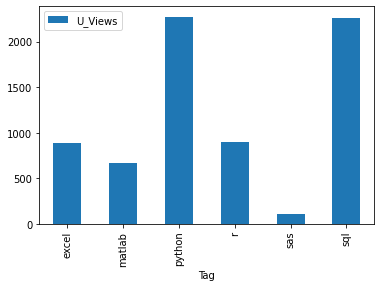

In [ ]:
ans_qs_ds_tags[['Tag','U_Views']].drop_duplicates().groupby(by='Tag').count().plot.bar()

So Questions with Python and SQL tags have high views

Average Time per Tag

In [ ]:
tt_tag=ans_qs_ds_tags[['Tag','Q_CreateDate','A_CreateDate']].drop_duplicates()
tt_qtag = pd.to_datetime(tt_tag.Q_CreateDate)
tt_atag = pd.to_datetime(tt_tag.A_CreateDate)
tt_tag['Diff']=tt_atag-tt_qtag
tt_tag

,Tag,Q_CreateDate,A_CreateDate,Diff
0,sql,2008-08-01T15:50:08Z,2008-09-23T22:41:11Z,53 days 06:51:03
1,sql,2008-08-05T06:39:31Z,2008-08-05T06:43:30Z,0 days 00:03:59
2,sql,2008-08-05T06:39:31Z,2008-08-06T14:26:08Z,1 days 07:46:37
3,sql,2008-08-05T06:39:31Z,2008-09-12T15:39:39Z,38 days 09:00:08
4,sql,2008-08-05T06:39:31Z,2008-09-16T05:43:22Z,41 days 23:03:51
...,...,...,...,...
96864,python,2016-10-19T18:40:13Z,2016-10-19T18:43:14Z,0 days 00:03:01
96865,python,2016-10-19T18:40:13Z,2016-10-19T18:58:03Z,0 days 00:17:50
96866,python,2016-10-19T20:48:21Z,2016-10-19T20:48:21Z,0 days 00:00:00
96867,python,2016-10-19T23:36:01Z,2016-10-19T23:38:17Z,0 days 00:02:16


In [ ]:
for i in tt_tag.Tag.unique():
  print('Average Time to Answer for Tag %s : %10.2f secs' % (i,np.average(tt_tag[tt_tag.Tag==i]['Diff'].dt.total_seconds())))

Average Time to Answer for Tag sql : 5389257.64 secs
Average Time to Answer for Tag python : 8389772.77 secs
Average Time to Answer for Tag excel : 7133932.32 secs
Average Time to Answer for Tag r : 5352426.12 secs
Average Time to Answer for Tag matlab : 4908133.77 secs
Average Time to Answer for Tag sas : 4903177.87 secs
